# Cervical Cancer Risk Prediction using Machine Learning

<font size='3'>Cervical cancer happens when cells in the cervix, the lower part of the uterus that connects to the vagina, start to become abnormal. Small changes in the cell DNA lets them to multiply out-of-control, and cells accumulate in growths called tumors. Cervical cancer is a highly preventable but potentially deadly disease that affects the cervix. It is primarily caused by persistent infection with certain strains of the human papillomavirus (HPV). </font>

- Cervical cancer kills about **4,000 women** in the U.S. and about **300,000 women** worldwide. Due to increased medical screening, cervical cancer death rate has been reduced by 74% from 1955 to 1992.

- Studies have shown that High sexual activity **Human papilloma virus (HPV)** is one of the key factors that increases the risk of having cervical cancer.

- Human papillomavirus (HPV) is the most common sexually transmitted infection (STI).Many people with HPV don't develop any symptoms but can still infect others through sexual contact. Symptoms may include warts on the genitals or surrounding skin.

- The presence of hormones in oral contraceptives, having many children, and smoking increase the risk for developing cervical cancer, particularly in women infected with HPV. Also, people with weak immune systems (HIV/AIDS) have high risk of HPV


- Regular screenings, such as Pap smears and HPV vaccines, can significantly reduce the risk of cervical cancer. Early detection and treatment are crucial for better outcomes, making awareness and preventive measures critical in the fight against this cancer.

- This dataset has around  **858 patients** observations and by building and training an **Extreme Gradient Boosting (XG-Boost)** algorithm to predict cervical cancer among those patients by the following process:-
    - Perform **EDA (Exploratory Data Analysis)** and **Data Visualization**.
    - Prepare the data before model training.
    - Understand, Train and evaluate and **XG-Boost** model.
    


#### Import Packages/Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [44]:
Cancer_df= pd.read_csv(r"C:\Users\hp\Downloads\kag_risk_factors_cervical_cancer.csv")
Cancer_df

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
5     42                       3.0                     23.0   
6     51                       3.0                     17.0   
7     26                       1.0                     26.0   
8     45                       1.0                     20.0   
9     44                       3.0                     15.0   
10    44                       3.0                     26.0   
11    27                       1.0                     17.0   
12    45                       4.0                     14.0   
13    44                       2.0                     25.0   
14    43                       2.0                     18.0   
15    40                       3.0                     18.0   
16    41                       4.0                     21.0   
17    43                       3.0                     15.0   
18    42                       2.0                     20.0   
19    40                       2.0                     27.0   
20    43                       2.0                     18.0   
21    41                       3.0                     17.0   
22    40                       1.0                     18.0   
23    40                       1.0                     20.0   
24    40                       3.0                     15.0   
25    44                       3.0                     19.0   
26    39                       5.0                     23.0   
27    39                       2.0                     17.0   
28    37                       3.0                     24.0   
29    37                       6.0                     26.0   
30    41                       3.0                     17.0   
31    40                       2.0                     21.0   
32    37                       3.0                     17.0   
33    37                       3.0                     15.0   
34    38                       2.0                     15.0   
35    37                       3.0                     17.0   
36    39                       2.0                     17.0   
37    37                         ?                     18.0   
38    39                       1.0                     24.0   
39    36                       2.0                     20.0   
40    37                         ?                     17.0   
41    37                       2.0                     18.0   
42    36                       3.0                     18.0   
43    36                       3.0                     17.0   
44    37                       3.0                     19.0   
45    36                       1.0                     17.0   
46    36                       2.0                     18.0   
47    40                       2.0                     20.0   
48    41                       2.0                     17.0   
49    37                       3.0                     18.0   
50    36                       3.0                     15.0   
51    36                       2.0                     17.0   
52    36                       5.0                     17.0   
53    35                       3.0                     18.0   
54    36                       1.0                     16.0   
55    41                       4.0                     16.0   
56    35                       5.0                     15.0   
57    33                       3.0                     21.0   
58    35                       2.0                     18.0   
59    35                       3.0                     17.0   
60    34                       3.0                     19.0   
61    35                       3.0                     20.0   
62    35                       1.0  

In [45]:
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [46]:
pd.set_option('display.max.rows',859)

In [47]:
pd.set_option('display.max.columns',36)

In [48]:
Cancer_df.head(10)

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   
5   42                       3.0                     23.0                2.0   
6   51                       3.0                     17.0                6.0   
7   26                       1.0                     26.0                3.0   
8   45                       1.0                     20.0                5.0   
9   44                       3.0                     15.0                  ?   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   
5    0.0            0.0                 0.0                     0.0   
6    1.0           34.0                 3.4                     0.0   
7    0.0            0.0                 0.0                     1.0   
8    0.0            0.0                 0.0                     0.0   
9    1.0    1.266972909                 2.8                     0.0   

  Hormonal Contraceptives (years)  IUD IUD (years) STDs STDs (number)  \
0                             0.0  0.0         0.0  0.0           0.0   
1                             0.0  0.0         0.0  0.0           0.0   
2                             0.0  0.0         0.0  0.0           0.0   
3                             3.0  0.0         0.0  0.0           0.0   
4                            15.0  0.0         0.0  0.0           0.0   
5                             0.0  0.0         0.0  0.0           0.0   
6                             0.0  1.0         7.0  0.0           0.0   
7                             2.0  1.0         7.0  0.0           0.0   
8                             0.0  0.0         0.0  0.0           0.0   
9                             0.0    ?           ?  0.0           0.0   

  STDs:condylomatosis STDs:cervical condylomatosis  \
0                 0.0                          0.0   
1                 0.0                          0.0   
2                 0.0                          0.0   
3                 0.0                          0.0   
4                 0.0                          0.0   
5                 0.0                          0.0   
6                 0.0                          0.0   
7                 0.0                          0.0   
8                 0.0                          0.0   
9                 0.0                          0.0   

  STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   
5                         0.0                                0.0   
6                         0.0                                0.0   
7                         0.0                                0.0   
8                         0.0                                0.0   
9                         0.0                                0.0   

  STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
0           0.0                              0.0                 0.0   
1           0.0                              0.0

In [49]:
Cancer_df.tail(10)

Age Number of sexual partners First sexual intercourse  \
848   31                       3.0                     18.0   
849   32                       3.0                     18.0   
850   19                       1.0                     14.0   
851   23                       2.0                     15.0   
852   43                       3.0                     17.0   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
848                1.0    0.0            0.0                 0.0   
849                1.0    1.0           11.0                0.16   
850                0.0    0.0            0.0                 0.0   
851                2.0    0.0            0.0                 0.0   
852                3.0    0.0            0.0                 0.0   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD IUD (years)  \
848                     1.0                             0.5  0.0         0.0   
849                     1.0                             6.0  0.0         0.0   
850                     0.0                             0.0  0.0         0.0   
851                     0.0                             0.0  0.0         0.0   
852                     1.0                             5.0  0.0         0.0   
853                     0.0                             0.0  0.0         0.0   
854                     1.0                             8.0  0.0         0.0   
855                     1.0                            0.08  0.0         0.0   
856                     1.0                            0.08  0.0         0.0   
857                     1.0                             0.5  0.0         0.0   

    STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis  \
848  0.0           0.0                 0.0                          0.0   
849  1.0           1.0                 0.0                          0.0   
850  0.0           0.0                 0.0                          0.0   
851  0.0           0.0                 0.0                          0.0   
852  0.0           0.0                 0.0                          0.0   
853  0.0           0.0                 0.0                          0.0   
854  0.0           0.0                 0.0                          0.0   
855  0.0           0.0                 0.0                          0.0   
856  0.0           0.0                 0.0                          0.0   
857  0.0           0.0                 0.0                          0.0   

    STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
848                         0.0                                0.0   
849                         0.0                                0.0   
850                         0.0                                0.0   
851                         0.0                                0.0   
852                         0.0                                0.0   
853                         0.0                                0.0   
854                         0.0                                0.0   
855                         0.0                                0.0   
856                         0.0                                0.0   
857                         0.0                                0.0   

    STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
848       

<font size='4'> Common ways in which Doctors examine whether the female has Cervical Cancer or not.<font> 
- Hinselmann: A colposcopy is a procedure in which doctors examine the cervix. 
- Schiller: Schiller's Iodine test is used for cervical cancer diagnosis
- Cytology: Cytology is the exam of a single cell type used for cancer screening.
- Biopsy: Biopsy is performed by removing a piece of tissue and examine it under microscope, 
    - Biopsy is the most common way doctors diagnose most types of cancer.

In [50]:
Cancer_df.describe()

Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [51]:
Cancer_df = Cancer_df.replace('?', np.NaN)
Cancer_df
                              

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
5     42                       3.0                     23.0   
6     51                       3.0                     17.0   
7     26                       1.0                     26.0   
8     45                       1.0                     20.0   
9     44                       3.0                     15.0   
10    44                       3.0                     26.0   
11    27                       1.0                     17.0   
12    45                       4.0                     14.0   
13    44                       2.0                     25.0   
14    43                       2.0                     18.0   
15    40                       3.0                     18.0   
16    41                       4.0                     21.0   
17    43                       3.0                     15.0   
18    42                       2.0                     20.0   
19    40                       2.0                     27.0   
20    43                       2.0                     18.0   
21    41                       3.0                     17.0   
22    40                       1.0                     18.0   
23    40                       1.0                     20.0   
24    40                       3.0                     15.0   
25    44                       3.0                     19.0   
26    39                       5.0                     23.0   
27    39                       2.0                     17.0   
28    37                       3.0                     24.0   
29    37                       6.0                     26.0   
30    41                       3.0                     17.0   
31    40                       2.0                     21.0   
32    37                       3.0                     17.0   
33    37                       3.0                     15.0   
34    38                       2.0                     15.0   
35    37                       3.0                     17.0   
36    39                       2.0                     17.0   
37    37                       NaN                     18.0   
38    39                       1.0                     24.0   
39    36                       2.0                     20.0   
40    37                       NaN                     17.0   
41    37                       2.0                     18.0   
42    36                       3.0                     18.0   
43    36                       3.0                     17.0   
44    37                       3.0                     19.0   
45    36                       1.0                     17.0   
46    36                       2.0                     18.0   
47    40                       2.0                     20.0   
48    41                       2.0                     17.0   
49    37                       3.0                     18.0   
50    36                       3.0                     15.0   
51    36                       2.0                     17.0   
52    36                       5.0                     17.0   
53    35                       3.0                     18.0   
54    36                       1.0                     16.0   
55    41                       4.0                     16.0   
56    35                       5.0                     15.0   
57    33                       3.0                     21.0   
58    35                       2.0                     18.0   
59    35                       3.0                     17.0   
60    34                       3.0                     19.0   
61    35                       3.0                     20.0   
62    35                       1.0  

In [52]:
Cancer_df.isnull()

Age  Number of sexual partners  First sexual intercourse  \
0    False                      False                     False   
1    False                      False                     False   
2    False                      False                      True   
3    False                      False                     False   
4    False                      False                     False   
5    False                      False                     False   
6    False                      False                     False   
7    False                      False                     False   
8    False                      False                     False   
9    False                      False                     False   
10   False                      False                     False   
11   False                      False                     False   
12   False                      False                     False   
13   False                      False                     False   
14   False                      False                     False   
15   False                      False                     False   
16   False                      False                     False   
17   False                      False                     False   
18   False                      False                     False   
19   False                      False                     False   
20   False                      False                     False   
21   False                      False                     False   
22   False                      False                     False   
23   False                      False                     False   
24   False                      False                     False   
25   False                      False                     False   
26   False                      False                     False   
27   False                      False                     False   
28   False                      False                     False   
29   False                      False                     False   
30   False                      False                     False   
31   False                      False                     False   
32   False                      False                     False   
33   False                      False                     False   
34   False                      False                     False   
35   False                      False                     False   
36   False                      False                     False   
37   False                       True                     False   
38   False                      False                     False   
39   False                      False                     False   
40   False                       True                     False   
41   False                      False                     False   
42   False                      False                     False   
43   False                      False                     False   
44   False                      False                     False   
45   False                      False                     False   
46   False                      False                     False   
47   False                      False                     False   
48   False                      False                     False   
49   False                      False                     False   
50   False                      False                     False   
51   False                      False                     False   
52   False                      False                     False   
53   False                      False                     False   
54   False                      False                     False   
55   False                      False                     False   
56   False                      False                     False   
57   False                      False                     False   
58   False                      False                 

<Axes: >

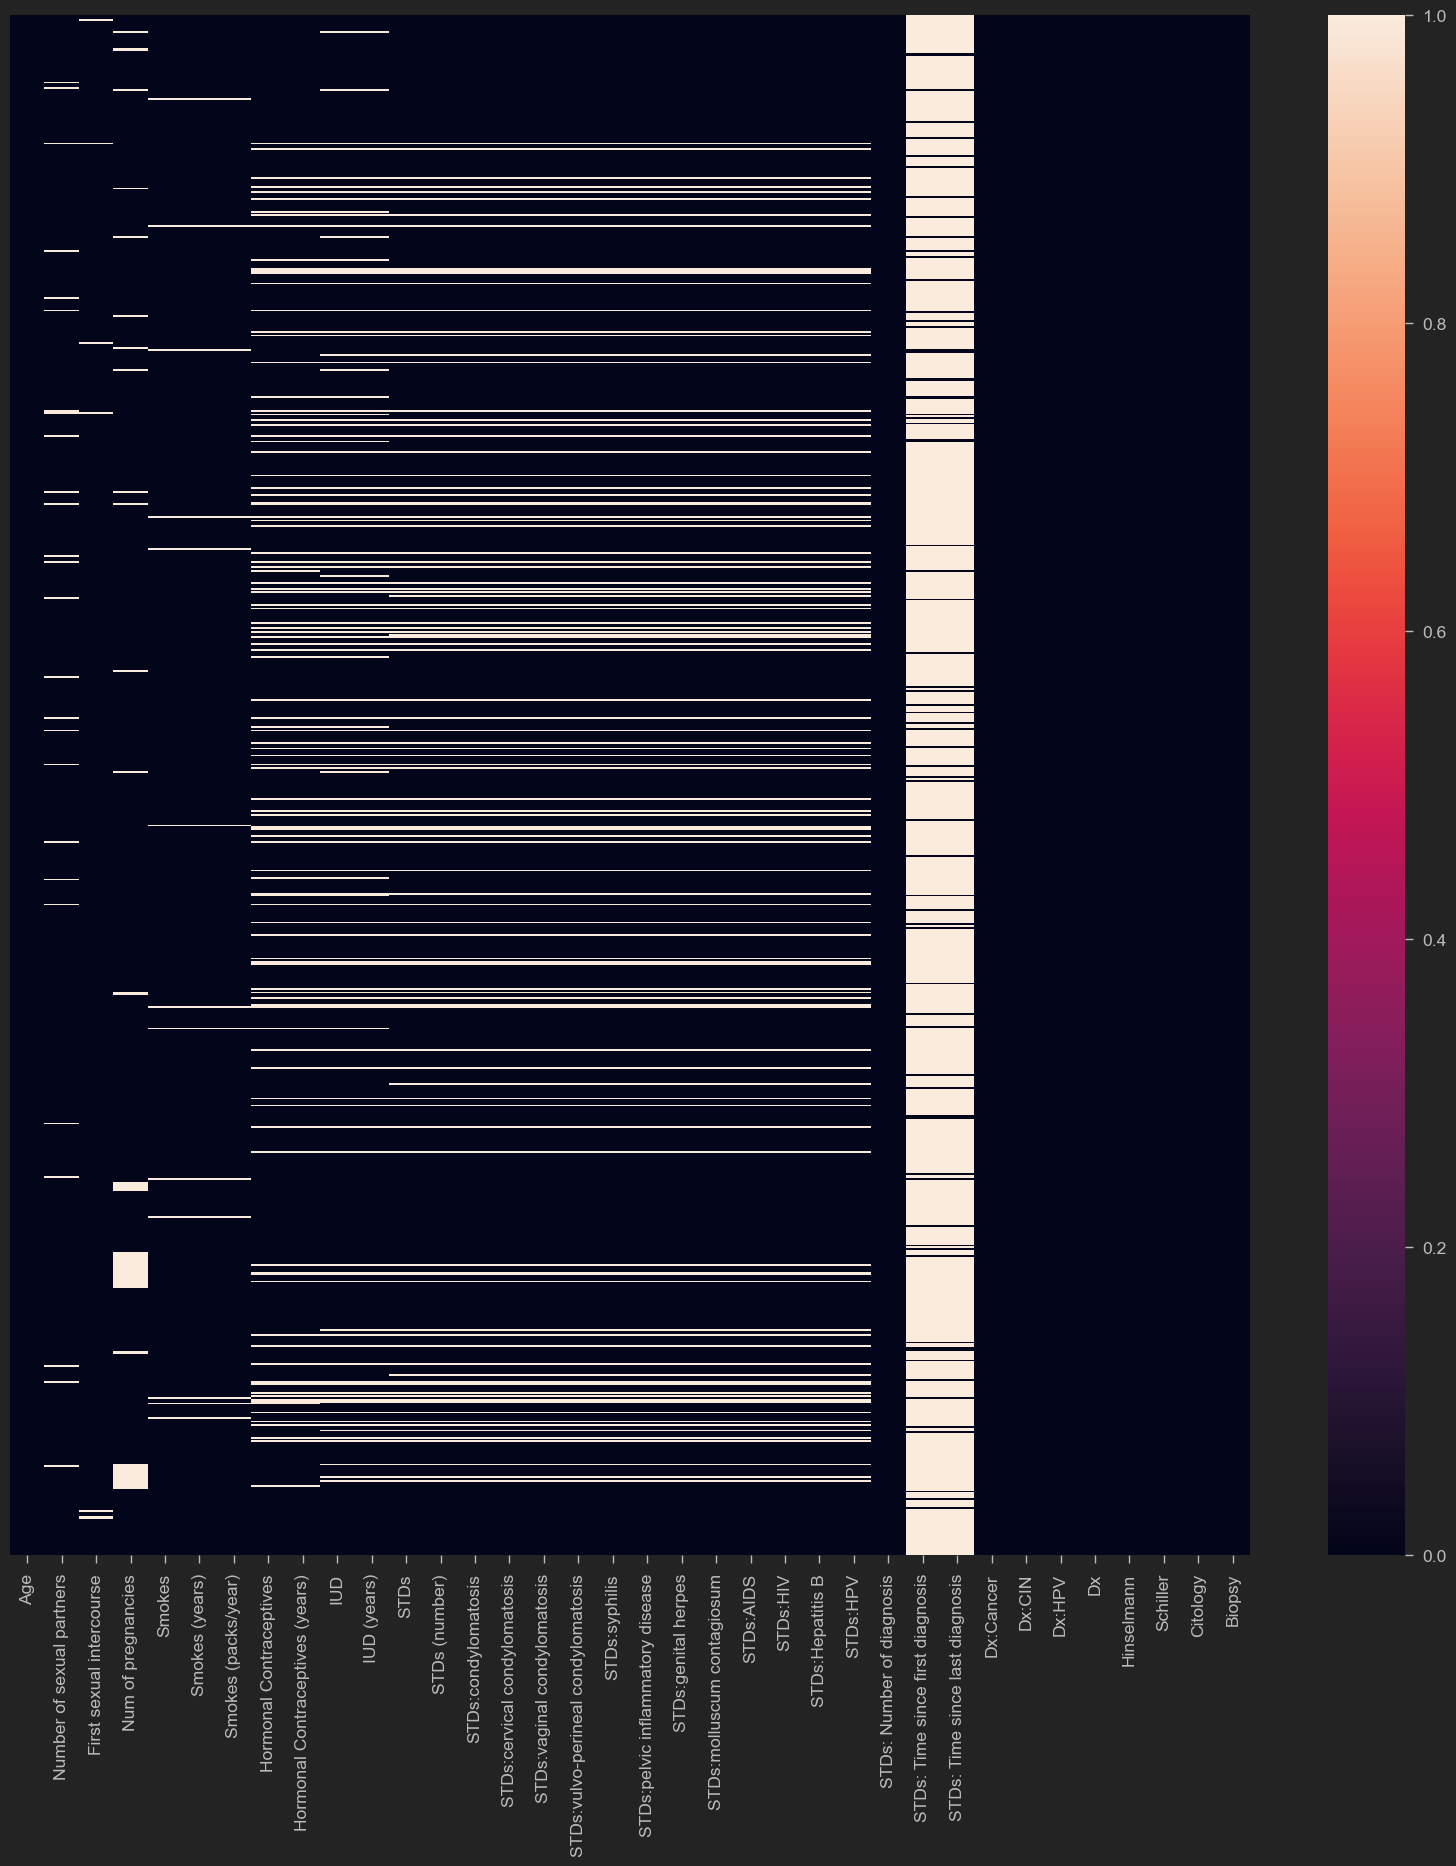

In [53]:
plt.figure(figsize= (20,20))
sns.heatmap(Cancer_df.isnull(), yticklabels=False)

In [54]:
Cancer_df= Cancer_df.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
Cancer_df

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
5     42                       3.0                     23.0   
6     51                       3.0                     17.0   
7     26                       1.0                     26.0   
8     45                       1.0                     20.0   
9     44                       3.0                     15.0   
10    44                       3.0                     26.0   
11    27                       1.0                     17.0   
12    45                       4.0                     14.0   
13    44                       2.0                     25.0   
14    43                       2.0                     18.0   
15    40                       3.0                     18.0   
16    41                       4.0                     21.0   
17    43                       3.0                     15.0   
18    42                       2.0                     20.0   
19    40                       2.0                     27.0   
20    43                       2.0                     18.0   
21    41                       3.0                     17.0   
22    40                       1.0                     18.0   
23    40                       1.0                     20.0   
24    40                       3.0                     15.0   
25    44                       3.0                     19.0   
26    39                       5.0                     23.0   
27    39                       2.0                     17.0   
28    37                       3.0                     24.0   
29    37                       6.0                     26.0   
30    41                       3.0                     17.0   
31    40                       2.0                     21.0   
32    37                       3.0                     17.0   
33    37                       3.0                     15.0   
34    38                       2.0                     15.0   
35    37                       3.0                     17.0   
36    39                       2.0                     17.0   
37    37                       NaN                     18.0   
38    39                       1.0                     24.0   
39    36                       2.0                     20.0   
40    37                       NaN                     17.0   
41    37                       2.0                     18.0   
42    36                       3.0                     18.0   
43    36                       3.0                     17.0   
44    37                       3.0                     19.0   
45    36                       1.0                     17.0   
46    36                       2.0                     18.0   
47    40                       2.0                     20.0   
48    41                       2.0                     17.0   
49    37                       3.0                     18.0   
50    36                       3.0                     15.0   
51    36                       2.0                     17.0   
52    36                       5.0                     17.0   
53    35                       3.0                     18.0   
54    36                       1.0                     16.0   
55    41                       4.0                     16.0   
56    35                       5.0                     15.0   
57    33                       3.0                     21.0   
58    35                       2.0                     18.0   
59    35                       3.0                     17.0   
60    34                       3.0                     19.0   
61    35                       3.0                     20.0   
62    35                       1.0  

In [57]:
#converting every single datatype into numerical for better understandings
Cancer_df= Cancer_df.apply(pd.to_numeric)
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [58]:
Cancer_df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               750.000000                       750.000000  741.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.479929                         3.764254    0.315593   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        30.000000    1.000000   

       IUD (years)        STDs  STDs (number)  STDs:condylomatosis  \
count   741.000000  753.000000     753.000000           753.000000   
mean      0.514804    0.104914       0.176627             0.058433   
std       1.943089    0.306646       0.561993             0.234716   
min       0.000000    0.000000       0.000000             0.000000   
25%       0.000000    0.000000       0.000000             0.000000   
50%       0.000000    0.000000       0.000000             0.000000   
75%       0.000000    0.000000       0.000000             0.000000   
max      19.000000    1.000000       4.000000             1.000000   

       STDs:cervical condylomatosis  STDs:vaginal condylomatosis  \
count                         753.0                   753.000000   
mean                            0.0                     0.005312   
std                             0.0                     0.072739   
min                             0.0                     0.000000   
25%                             0.0                     0.000000   
50%                             0.0                     0.000000   
75%                             0.0                     0.000000   
max                             0.0                     1.000000   

       STDs:vulvo-perineal condylomatosis  STDs:syphilis  \
count                          753.000000     753.000000   
mean                             0.057105       0.023904   
std                              0.232197       0.152853   
min                              0.000000       0.000000   
25%                              0.000000       0.000000   
50%                              0.000000       0.000000   
75%                              0.000000       0.000000   
max                              1.000000       1.000000   

       STDs:pelvic inflammatory disease  STDs:genital herpes  \
count                        753.000000           753.000000   
mean               

In [59]:
Cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [60]:
Cancer_df= Cancer_df.fillna(Cancer_df.mean())

<Axes: >

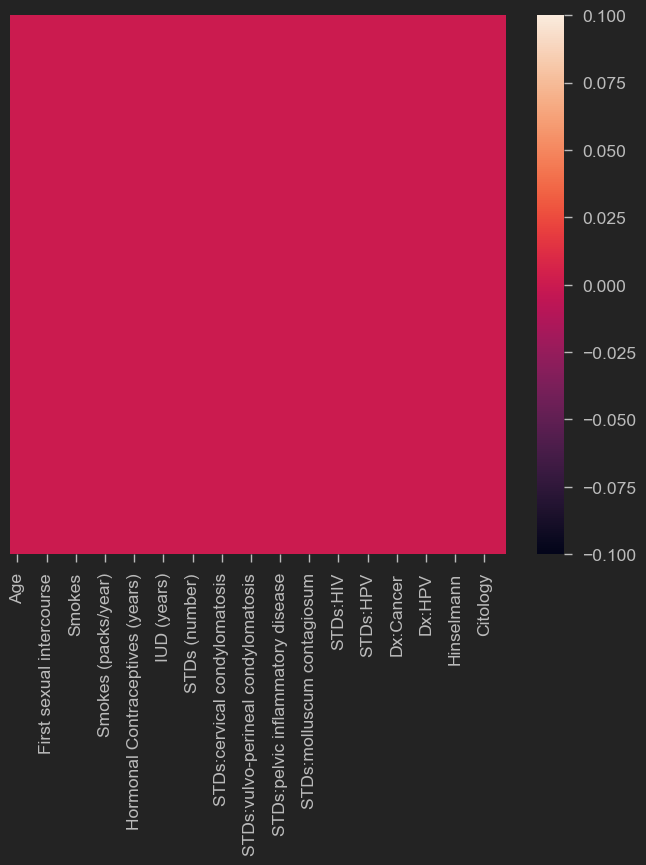

In [61]:
sns.heatmap(Cancer_df.isnull(), yticklabels= False)

In [62]:
Cancer_df['Age'].agg(['min','max'])

min    13
max    84
Name: Age, dtype: int64

In [63]:
Cancer_df[Cancer_df['Age']<=20]

Age  Number of sexual partners  First sexual intercourse  \
0     18                   4.000000                      15.0   
1     15                   1.000000                      14.0   
141   20                   3.000000                      18.0   
169   18                   3.000000                      18.0   
277   20                   1.000000                      19.0   
301   20                   2.527644                      16.0   
305   20                   5.000000                      17.0   
315   20                   3.000000                      16.0   
317   20                   1.000000                      20.0   
322   20                   2.000000                      17.0   
325   20                   1.000000                      19.0   
327   20                   2.000000                      15.0   
328   20                   4.000000                      15.0   
338   20                   5.000000                      14.0   
339   20                   2.000000                      18.0   
340   19                   3.000000                      18.0   
341   19                   1.000000                      16.0   
343   20                   1.000000                      15.0   
344   18                   1.000000                      17.0   
346   19                   4.000000                      14.0   
347   19                   2.000000                      15.0   
348   19                   1.000000                      17.0   
350   20                   1.000000                      18.0   
351   19                   4.000000                      15.0   
352   19                   4.000000                      15.0   
355   19                   3.000000                      13.0   
356   18                   1.000000                      17.0   
361   20                   4.000000                      17.0   
362   20                   1.000000                      15.0   
363   18                   1.000000                      15.0   
364   19                   3.000000                      16.0   
365   20                   2.000000                      16.0   
366   19                   3.000000                      15.0   
367   19                   1.000000                      19.0   
368   20                   2.527644                      16.0   
369   18                   1.000000                      18.0   
377   20                   2.000000                      14.0   
378   18                   2.000000                      15.0   
380   18                   3.000000                      15.0   
381   19                   3.000000                      15.0   
383   19                   2.000000                      15.0   
384   18                   1.000000                      16.0   
386   18                   2.000000                      15.0   
388   20                   3.000000                      14.0   
389   17                   1.000000                      17.0   
390   20                   2.000000                      17.0   
391   17                   2.527644                      15.0   
392   19                   1.000000                      16.0   
393   19                   3.000000                      15.0   
394   20                   2.000000                      18.0   
395   18                   1.000000                      18.0   
396   18                   3.000000                      14.0   
397   19                   2.000000                      16.0   
398   18                   2.527644                      16.0   
400   17                   2.000000                      15.0   
402   18                   3.000000                      15.0   
403   17                   3.000000                      15.0   
404   18                   2.000000                      15.0   
405   17                   2.000000                      16.0   
406   17                   1.000000                      17.0   
407   17                   2.000000     

In [64]:
Cancer_df[Cancer_df['Age']>80]

Age  Number of sexual partners  First sexual intercourse  \
668   84                        3.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
668                11.0     1.0            24.0             0.513202   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  \
668                      0.0                              0.0  0.0   

     IUD (years)  STDs  STDs (number)  STDs:condylomatosis  \
668          0.0   0.0            0.0                  0.0   

     STDs:cervical condylomatosis  STDs:vaginal condylomatosis  \
668                           0.0                          0.0   

     STDs:vulvo-perineal condylomatosis  STDs:syphilis  \
668                                 0.0            0.0   

     STDs:pelvic inflammatory disease  STDs:genital herpes  \
668                               0.0                  0.0   

     STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  \
668                         0.0        0.0       0.0               0.0   

     STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
668       0.0                          0          0       0       0   0   

     Hinselmann  Schiller  Citology  Biopsy  
668           0         1         0       0

In [65]:
corr_matrix= Cancer_df.corr()
corr_matrix

Age  Number of sexual partners  \
Age                                 1.000000                   0.084896   
Number of sexual partners           0.084896                   1.000000   
First sexual intercourse            0.369168                  -0.147937   
Num of pregnancies                  0.526137                   0.076719   
Smokes                              0.055813                   0.238078   
Smokes (years)                      0.217349                   0.177117   
Smokes (packs/year)                 0.131180                   0.175153   
Hormonal Contraceptives             0.065624                   0.006342   
Hormonal Contraceptives (years)     0.277181                   0.018552   
IUD                                 0.267662                   0.030005   
IUD (years)                         0.205886                   0.004215   
STDs                                0.010017                   0.053754   
STDs (number)                      -0.015488                   0.039359   
STDs:condylomatosis                -0.025012                   0.034646   
STDs:cervical condylomatosis             NaN                        NaN   
STDs:vaginal condylomatosis         0.006220                  -0.042924   
STDs:vulvo-perineal condylomatosis -0.022614                   0.036750   
STDs:syphilis                       0.010442                   0.027178   
STDs:pelvic inflammatory disease    0.023216                   0.030616   
STDs:genital herpes                -0.029076                  -0.031826   
STDs:molluscum contagiosum         -0.000919                   0.030616   
STDs:AIDS                                NaN                        NaN   
STDs:HIV                           -0.002025                   0.019871   
STDs:Hepatitis B                   -0.029076                  -0.011012   
STDs:HPV                            0.038546                   0.013871   
STDs: Number of diagnosis          -0.001606                   0.051559   
Dx:Cancer                           0.110340                   0.022309   
Dx:CIN                              0.061443                   0.015691   
Dx:HPV                              0.101722                   0.027264   
Dx                                  0.092635                   0.022982   
Hinselmann                         -0.003967                  -0.039273   
Schiller                            0.103283                  -0.008899   
Citology                           -0.016862                   0.021839   
Biopsy                              0.055956                  -0.001429   

                                    First sexual intercourse  \
Age                                                 0.369168   
Number of sexual partners                          -0.147937   
First sexual intercourse                            1.000000   
Num of pregnancies                                 -0.058223   
Smokes                                             -0.123602   
Smokes (years)                                     -0.058366   
Smokes (packs/year)                                -0.056332   
Hormonal Contraceptives                             0.018344   
Hormonal Contraceptives (years)                     0.008000   
IUD                                                -0.020975   
IUD (years)                                        -0.024803   
STDs                                               -0.013133   
STDs (number)                                       0.006487   
STDs:condylomatosis                                 0.026777   
STDs:cervical condylomatosis                             NaN   
STDs:vaginal condylomatosis                         0.071425   
STDs:vulvo-perineal condylomatosis                  0.031082   
STDs:syphilis                                      -0.100999   
STDs:pelvic inflammatory disease                   -0.001089   
STDs:genital herpes                                 0.023398   
STDs:molluscum contagiosum                         -0.013332   
STDs:AI

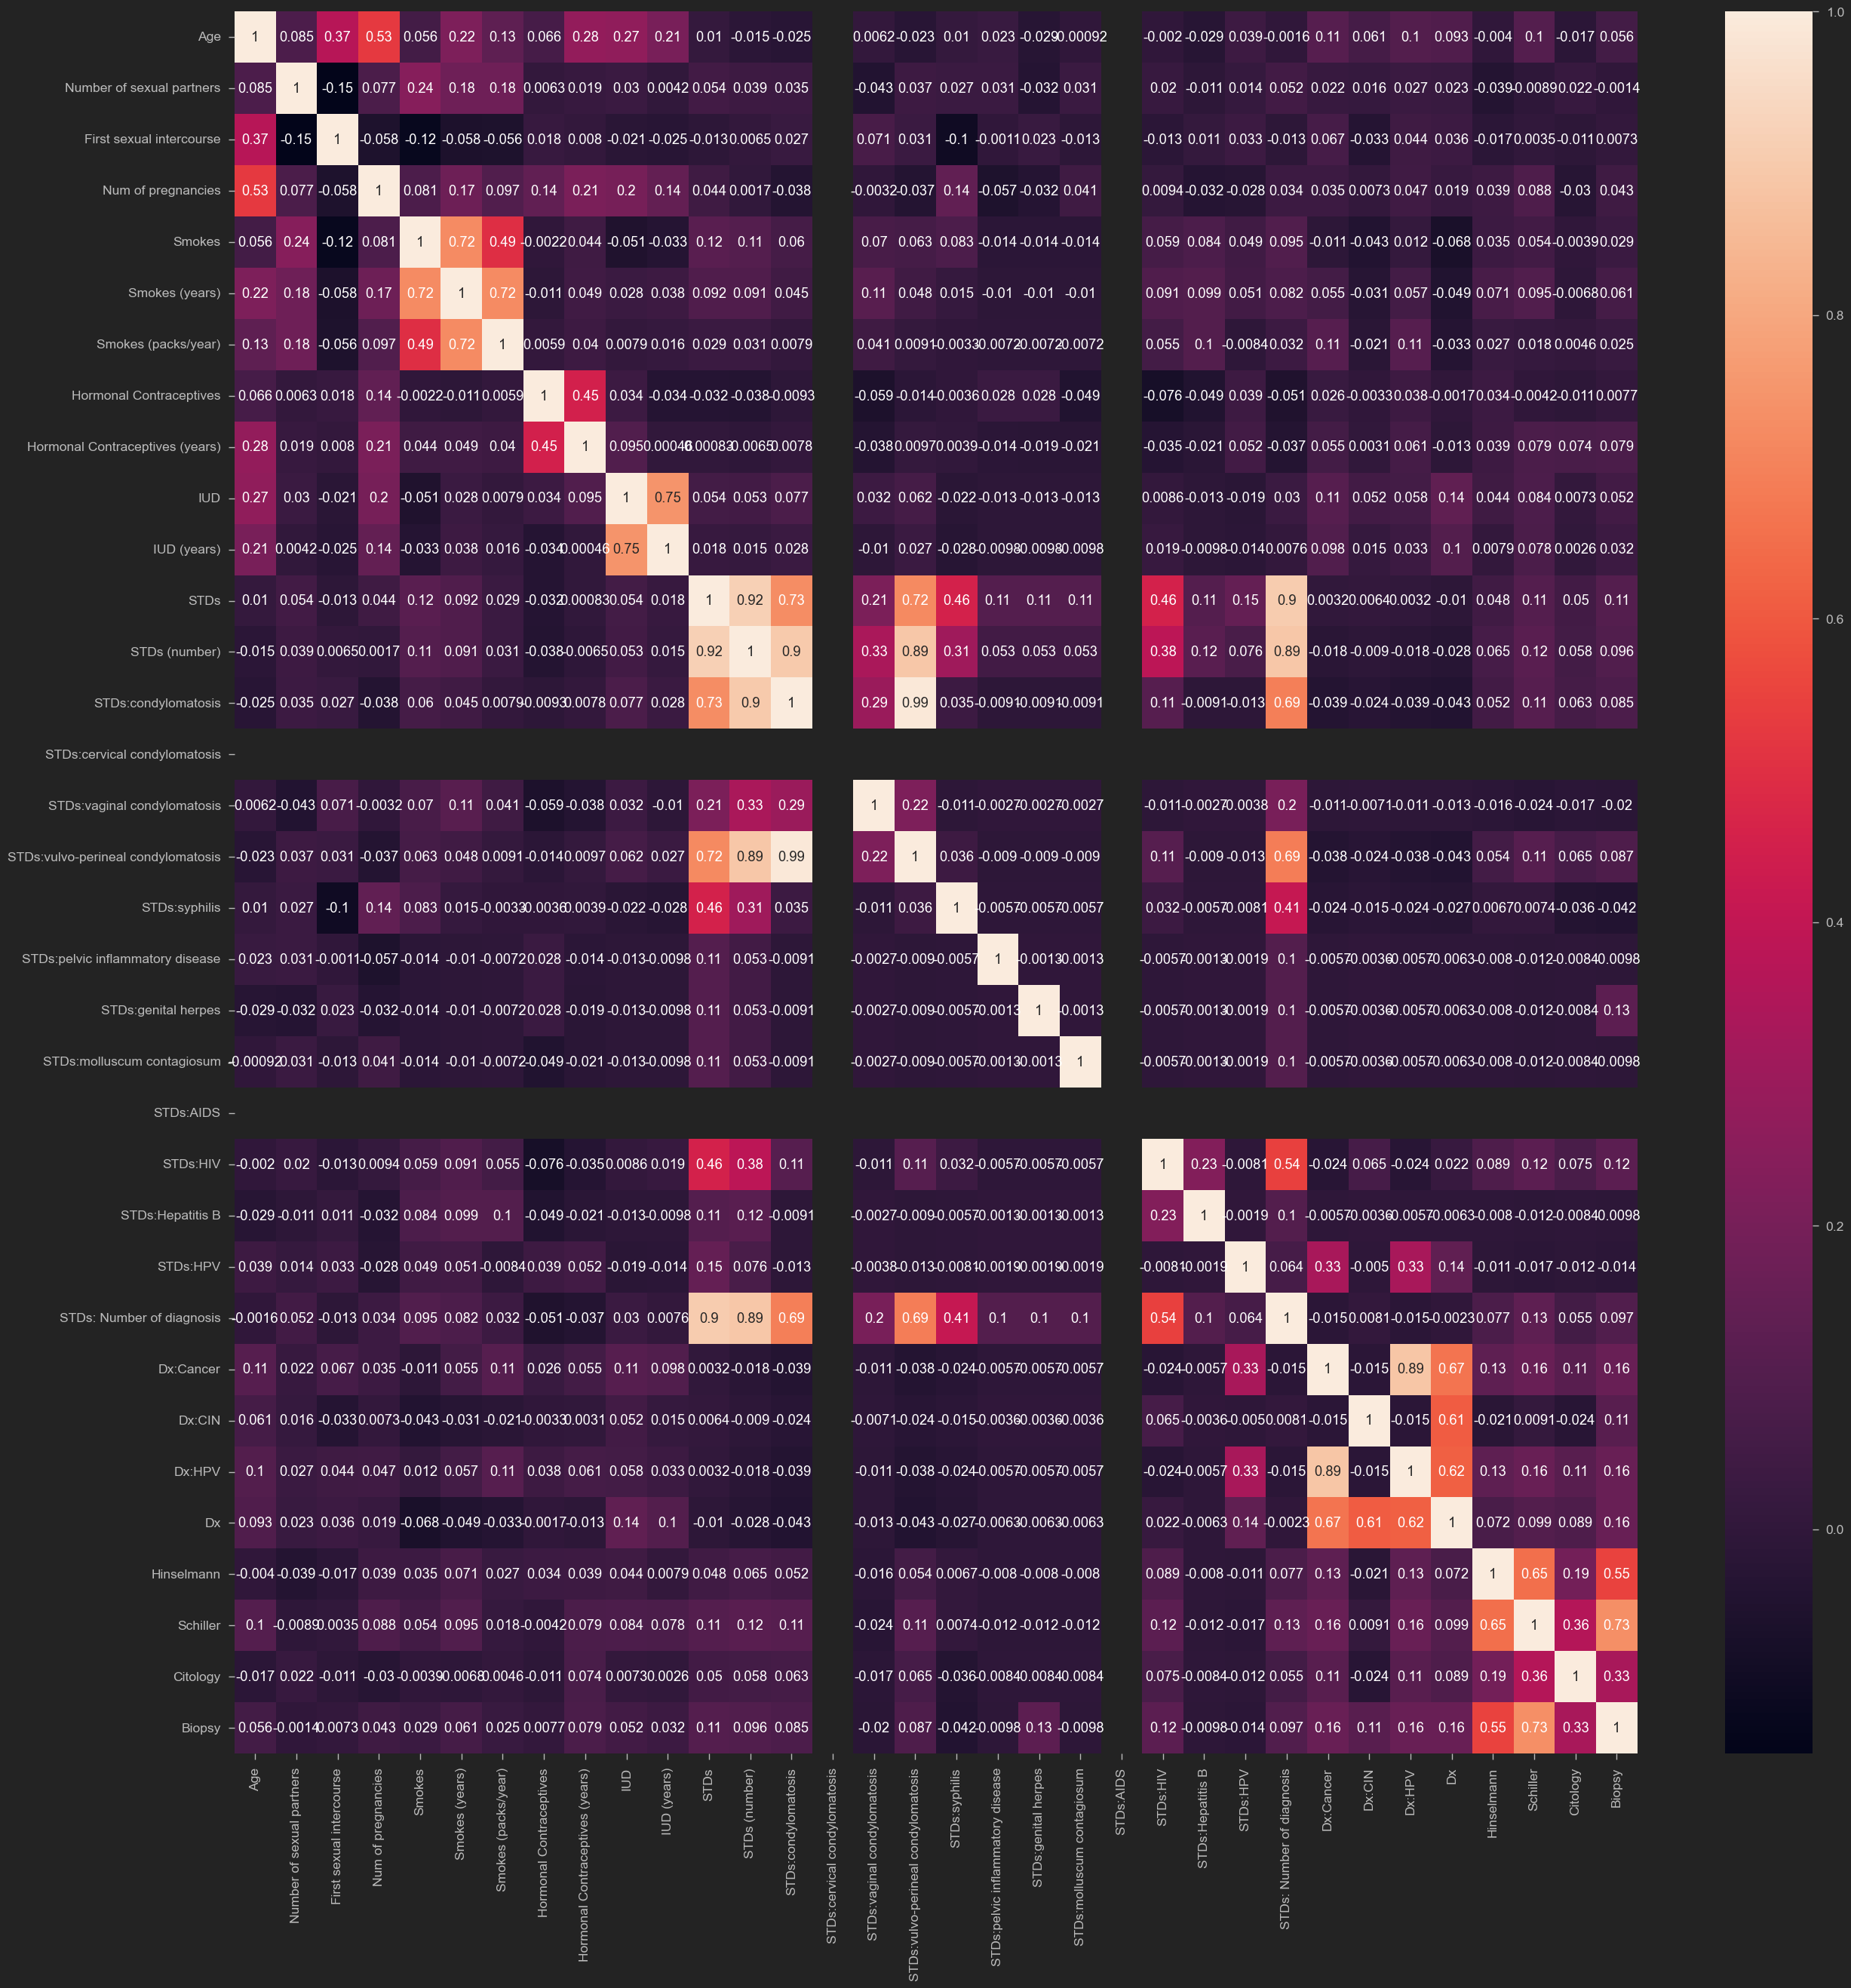

In [66]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

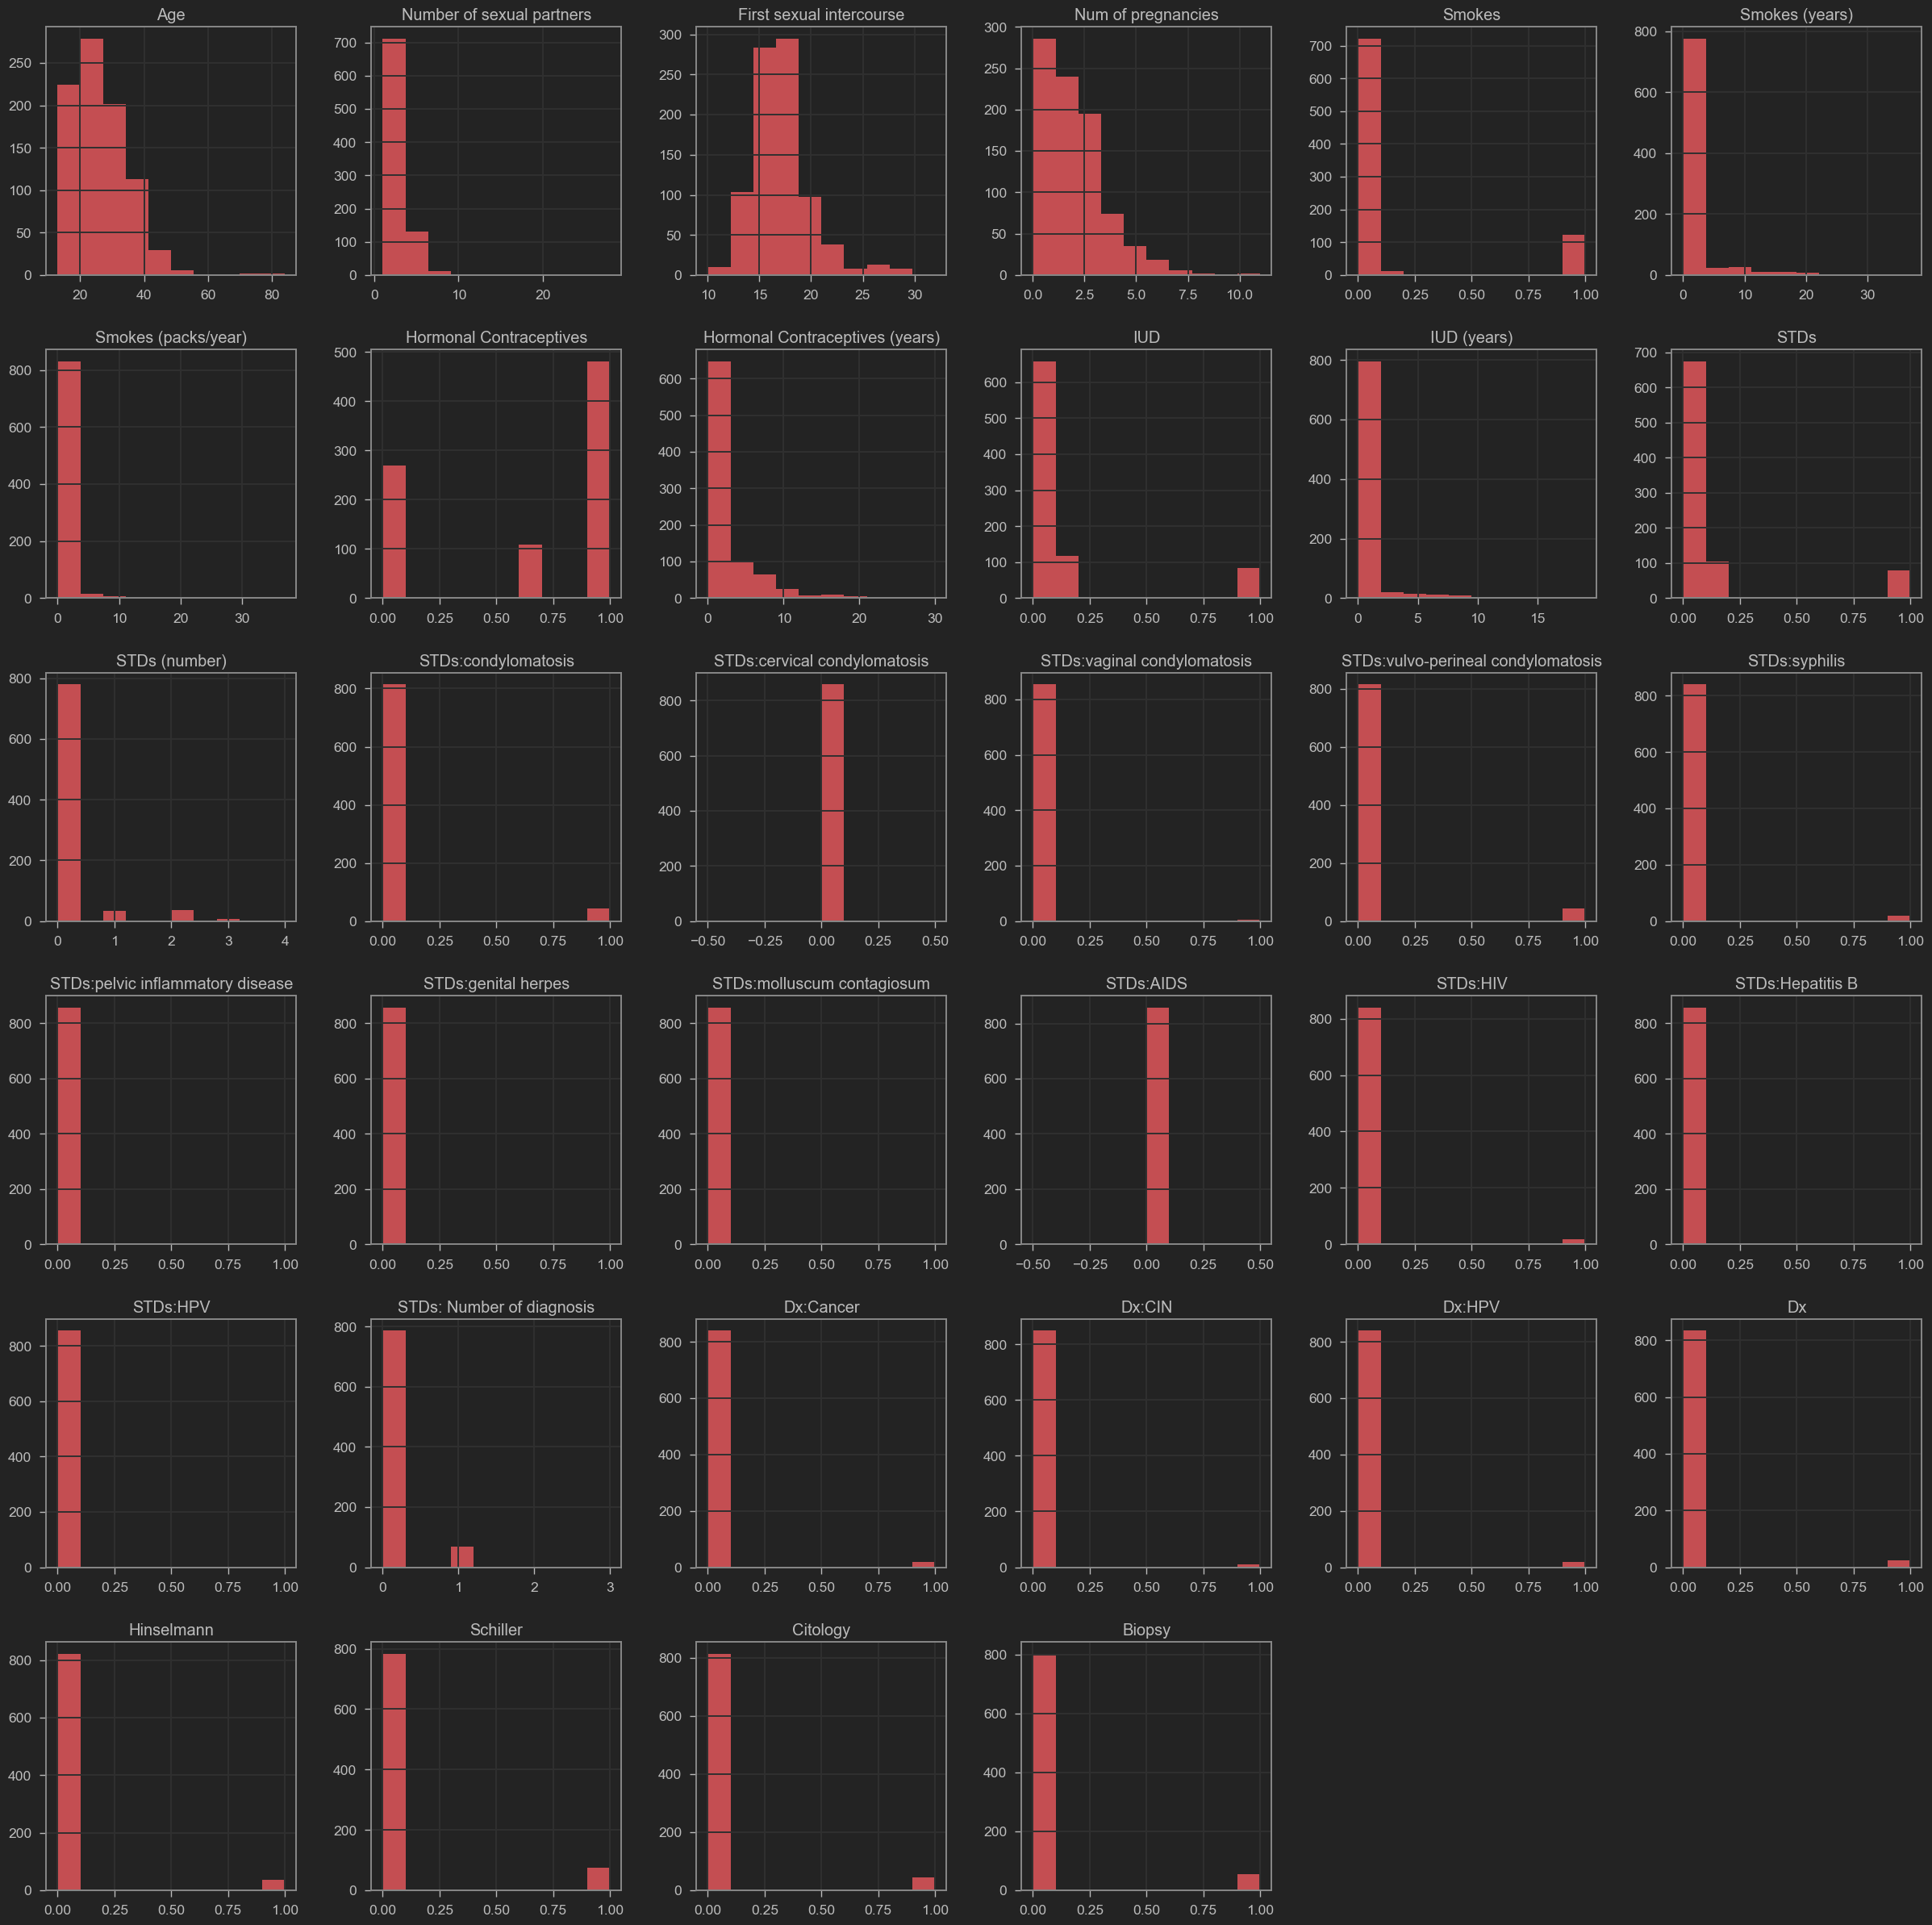

In [67]:
Cancer_df.hist(bins=10, figsize=(30,30), color='r')

In [71]:
target_df= Cancer_df['Biopsy']
input_df= Cancer_df.drop(columns=['Biopsy'], axis=1)

In [72]:
target_df.shape

(858,)

In [73]:
input_df.shape

(858, 33)

In [74]:
X= np.array(input_df).astype('float32')
y= np.array(target_df).astype('float32')

y=y.reshape(-1,1)

In [75]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [76]:
X

array([[-1.0385634e+00,  8.9706147e-01, -7.1509570e-01, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [-1.3917956e+00, -9.3074709e-01, -1.0734857e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 8.4534228e-01, -9.3074709e-01,  2.2945171e-07, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       ...,
       [-2.1435463e-01, -3.2147753e-01,  1.6845580e-03, ...,
        -2.0622157e-01, -3.0722591e-01,  4.3011627e+00],
       [ 7.2759819e-01, -3.2147753e-01,  2.5104153e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 2.5662178e-01, -3.2147753e-01,  1.0768549e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01]], dtype=float32)

In [77]:
#Spliting Data into test and train sets for better efficiency 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
X_val, X_test, y_val, y_test= train_test_split(X_test,y_test, test_size=0.5)

### X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25)

- XGBoost or Extreme Gradient Boosting is the algorithm of choice for many data scientists and could be used for regression and classification tasks

- XGBoost is a supervised learning algorithm and implements gradient boosted trees algorithm.

- The algorithm work by combining an ensemble of predictions from several weak models.

- It is robust to many data distributions and relationships and offers many hyperparameters to tune model performance.

- XGBoost offers increased speed and enhanced memory utilization.

- XGBoost is analogous to the idea of "discovering truth by building on previous discoveries".

In [79]:

!pip install seaborn
!pip install xgboost

In [80]:
#Train an XGBoost Classifier model
import xgboost as xgb

model= xgb.XGBClassifier(learning_rate=0.1, max_depth=50, n_estimators=100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
result_train = model.score(X_train, y_train)

result_train

0.9956268221574344

In [82]:
result_test = model.score(X_test, y_test)

result_test

0.9651162790697675

In [83]:
y_predict = model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        80
         1.0       0.80      0.67      0.73         6

    accuracy                           0.97        86
   macro avg       0.89      0.83      0.85        86
weighted avg       0.96      0.97      0.96        86



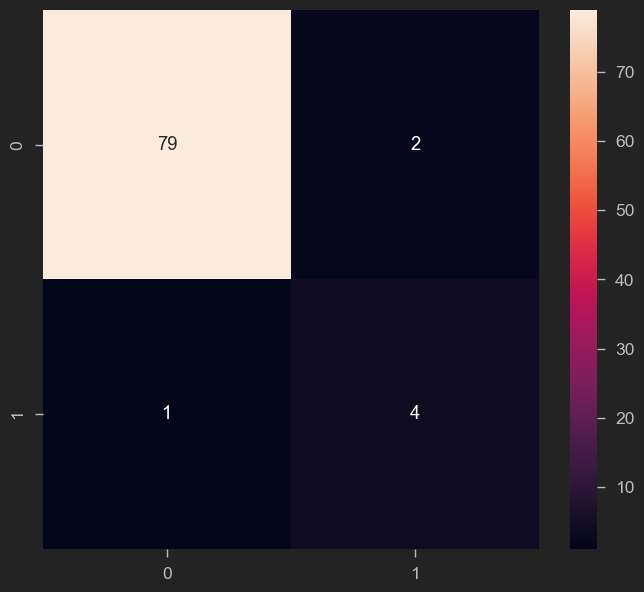

In [85]:
cm = confusion_matrix(y_predict, y_test)

sns.heatmap(cm, annot = True)

plt.show()